# Introduction to Pandas

![Pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/500px-Pandas_logo.svg.png)
## What is it?
`pandas` is an open source **Python** library for data analysis. Python has always been great for prepping and munging data, but it's never been great for analysis - you'd usually end up using **R** or loading it into a database and using SQL (or worse, Excel). **pandas** makes Python great for analysis.

> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working > with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building
> block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming > the most powerful and flexible open source data analysis / manipulation tool available in any language. It is 
> already well on its way toward this goal.

`pandas` is well suited for many different kinds of data:

  - Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
  - Ordered and unordered (not necessarily fixed-frequency) time series data.
  - Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
  - Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, `Series` (1-dimensional) and `DataFrame` (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For **R** users, `DataFrame` provides everything that **R**’s data.frame provides and much more. `pandas` is built on top of `numpy` and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

  - Easy handling of missing data (represented as `nan`) in floating point as well as non-floating point data
  - Size mutability: columns can be inserted and deleted from `DataFrame` and higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let `Series`, `DataFrame`, etc. automatically align the data for you in computations
  - Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
  - Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into `DataFrame` objects
  - Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
  - Intuitive merging and joining data sets
  - Flexible reshaping and pivoting of data sets
  - Hierarchical labeling of axes (possible to have multiple labels per tick)
  - Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
  - Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## Data Structures
`pandas` introduces two new data structures to Python - `Series` and `DataFrame`, both of which are built on top of `numpy` (this means it's fast).

Most common way to import `pandas` is

In [1]:
import pandas as pd

## Series
A `Series` is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [2]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Tonda', 3.14, -1789710578, 'Blaník'])
s

0              7
1          Tonda
2           3.14
3    -1789710578
4         Blaník
dtype: object

In [3]:
s[2]

3.14

In [4]:
l = [7, 'Tonda', 3.14, -1789710578, 'Blaník']

In [5]:
l[2]

3.14

Alternatively, you can specify an index to use when creating the `Series`.

In [6]:
s = pd.Series([7, 'Tonda', 3.14, -1789710578, 'Blaník'], index=['A', 'Z', 'C', 'Y', 'E'])
s

A              7
Z          Tonda
C           3.14
Y    -1789710578
E         Blaník
dtype: object

In [7]:
s['C']

3.14

You can also assign a name to the `Series`.

In [8]:
s = pd.Series([7, 'Tonda', 3.14, -1789710578, 'Blaník'], index=['A', 'Z', 'C', 'Y', 'E'], name='Stream')
s

A              7
Z          Tonda
C           3.14
Y    -1789710578
E         Blaník
Name: Stream, dtype: object

The `Series` constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [9]:
d = {'Brno': 1000, 'Praha': 1300, 'Ostrava': 900, 'Plzeň': 1100,
     'České Budějovice': 450, 'Nejdek': None}
cities = pd.Series(d)
cities

Brno                1000.0
Praha               1300.0
Ostrava              900.0
Plzeň               1100.0
České Budějovice     450.0
Nejdek                 NaN
dtype: float64

In [10]:
d

{'Brno': 1000,
 'Praha': 1300,
 'Ostrava': 900,
 'Plzeň': 1100,
 'České Budějovice': 450,
 'Nejdek': None}

You can use the index to select specific items from the `Series` ...

In [11]:
cities['Praha']

1300.0

In [12]:
sm = cities[['Brno', 'Praha', 'Ostrava']]
sm

Brno       1000.0
Praha      1300.0
Ostrava     900.0
dtype: float64

In [13]:
cities.mean()

950.0

Or you can use boolean indexing for selection.

In [14]:
cities[cities < 1000]

Ostrava             900.0
České Budějovice    450.0
dtype: float64

You can also change the values in a `Series` on the fly.

In [15]:
# changing based on the index
print('Old value:', cities['Praha'])
cities['Praha'] = 1400
print('New value:', cities['Praha'])

Old value: 1300.0
New value: 1400.0


In [16]:
cities['Olomouc'] = 880
cities

Brno                1000.0
Praha               1400.0
Ostrava              900.0
Plzeň               1100.0
České Budějovice     450.0
Nejdek                 NaN
Olomouc              880.0
dtype: float64

In [17]:
# changing values using boolean logic
print(cities[cities < 1000])

Ostrava             900.0
České Budějovice    450.0
Olomouc             880.0
dtype: float64


In [18]:
cities[cities < 1000] = 750
print(cities)

Brno                1000.0
Praha               1400.0
Ostrava              750.0
Plzeň               1100.0
České Budějovice     750.0
Nejdek                 NaN
Olomouc              750.0
dtype: float64


What if you aren't sure whether an item is in the `Series`? You can check using idiomatic Python.

In [19]:
'Nejdek' in cities


True

Mathematical operations can be done using scalars and functions.

In [20]:
# divide city values by 3
cities / 3

Brno                333.333333
Praha               466.666667
Ostrava             250.000000
Plzeň               366.666667
České Budějovice    250.000000
Nejdek                     NaN
Olomouc             250.000000
dtype: float64

In [21]:
# square city values
cities**2

Brno                1000000.0
Praha               1960000.0
Ostrava              562500.0
Plzeň               1210000.0
České Budějovice     562500.0
Nejdek                    NaN
Olomouc              562500.0
dtype: float64

You can add two `Series` together, which returns a union of the two `Series` with the addition occurring on the shared index values. Values on either `Series` that did not have a shared index will produce a NULL/NaN (not a number).

In [22]:
a = cities[['Praha', 'Brno', 'Ostrava']]
b = cities[['České Budějovice', 'Brno']]

In [23]:
a

Praha      1400.0
Brno       1000.0
Ostrava     750.0
dtype: float64

In [24]:
b

České Budějovice     750.0
Brno                1000.0
dtype: float64

In [25]:
a + b

Brno                2000.0
Ostrava                NaN
Praha                  NaN
České Budějovice       NaN
dtype: float64

Notice that because Ostrava, Praha, and České Budějovice were not found in **both** Series, they were returned with NULL/NaN values.

NULL checking can be performed with isnull and notnull.

In [26]:
# returns a boolean series indicating which values aren't NULL
cities[cities.notnull()]

Brno                1000.0
Praha               1400.0
Ostrava              750.0
Plzeň               1100.0
České Budějovice     750.0
Olomouc              750.0
dtype: float64

In [27]:
# use boolean logic to grab or remove the NULL cities
print(cities.isnull())

Brno                False
Praha               False
Ostrava             False
Plzeň               False
České Budějovice    False
Nejdek               True
Olomouc             False
dtype: bool


In [28]:
print(cities[cities.isnull()])

Nejdek   NaN
dtype: float64


In [29]:
print(cities[~cities.isnull()])

Brno                1000.0
Praha               1400.0
Ostrava              750.0
Plzeň               1100.0
České Budějovice     750.0
Olomouc              750.0
dtype: float64


## DataFrame
A `DataFrame` is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a `DataFrame` as a group of `Series` objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with `DataFrames`.

### Different ways to create Pandas Dataframe
Pandas `DataFrame` can be created in multiple ways. Let’s discuss different ways to create a `DataFrame` one by one.
#### Method #1: Creating Pandas DataFrame from lists of lists.

In [30]:
# initialize list of lists 
data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, index=['a','b','c'], columns=['Name', 'Age']) 
  
# print dataframe. 
df

,Name,Age
a,tom,10
b,nick,15
c,juli,14


#### Method #2: Creating DataFrame from dict of narray/lists
To create `DataFrame` from dictionary of narray/list, all the narray must be of same length. If index is passed then the length index should be equal to the length of arrays. If no index is passed, then by default, index will be range(n) where n is the array length.

In [31]:
# intialise dict of lists. 
data = {'Name':['Tom', 'nick', 'krish', 'jack'], 
        'Age':[20, 21, 19, 18]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


In [32]:
# intialise dict of lists. 
data = {'Name':['Tom', 'nick', 'krish', 'jack'], 
        'Age':[20, 21, 19, 18]} 
  
# Create DataFrame 
df = pd.DataFrame(data, index=['P1', 'P2', 'P3', 'P4']) 
  
# Print the output. 
df

,Name,Age
P1,Tom,20
P2,nick,21
P3,krish,19
P4,jack,18


#### Method #4: Creating Dataframe from list of dicts
Pandas `DataFrame` can be created by passing lists of dictionaries as a input data. By default dictionary keys taken as columns. Note that missing values are filled as NaN.

In [33]:
# Initialise data to lists. 
data = [{'a': 1, 'b': 2, 'c':3}, 
        {'a':10, 'c': 20, 'b': 30},
        {'a':30, 'b': 63}] 
  
# Creates DataFrame. 
df = pd.DataFrame(data, index =['first', 'second', 'third']) 
  
# Print the data 
df

,a,b,c
first,1,2,3.0
second,10,30,20.0
third,30,63,NaN


#### Method #5: Creating DataFrame using zip() function.

Two or more lists can be merged by using `zip()` function and passed to `pd.DataFrame()` function.

In [34]:
# List1  
Name = ['tom', 'krish', 'nick', 'juli']  
    
# List2  
Age = [25, 30, 26, 22]  
    
# pandas Dataframe.  
df = pd.DataFrame(zip(Name, Age), columns = ['Name', 'Age'])  
     
# Print data.  
df  

,Name,Age
0,tom,25
1,krish,30
2,nick,26
3,juli,22


### NOTE
There are several other methods which could be used to [create or initialize Pandas DataFrame](https://towardsdatascience.com/15-ways-to-create-a-pandas-dataframe-754ecc082c17).

### Index from column
Index could be also created from existing column

In [35]:
data = {'rok': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
        'přihlášeno': [1524, 1607, 1793, 1751, 1629, 1563, 1564, 1415],
        'přijato': [964, 1130, 1168, 1031, 1077, 1114, 1092, 1018]}
prfuk = pd.DataFrame(data)
prfuk

,rok,přihlášeno,přijato
0,2009,1524,964
1,2010,1607,1130
2,2011,1793,1168
3,2012,1751,1031
4,2013,1629,1077
5,2014,1563,1114
6,2015,1564,1092
7,2016,1415,1018


In [36]:
r = prfuk.set_index('rok')
r

,přihlášeno,přijato
rok,,
2009,1524,964
2010,1607,1130
2011,1793,1168
2012,1751,1031
2013,1629,1077
2014,1563,1114
2015,1564,1092
2016,1415,1018


In [37]:
r['přijato'] /6

rok
2009    160.666667
2010    188.333333
2011    194.666667
2012    171.833333
2013    179.500000
2014    185.666667
2015    182.000000
2016    169.666667
Name: přijato, dtype: float64

This allows you to easily access data based on 'rok'.

In [38]:
r.loc[2013]

přihlášeno    1629
přijato       1077
Name: 2013, dtype: int64

The new values could be calculated and assigned to new column

In [39]:
prfuk['úspěšnost'] = prfuk['přijato'] / prfuk['přihlášeno']
prfuk

,rok,přihlášeno,přijato,úspěšnost
0,2009,1524,964,0.632546
1,2010,1607,1130,0.703174
2,2011,1793,1168,0.651422
3,2012,1751,1031,0.588806
4,2013,1629,1077,0.661142
5,2014,1563,1114,0.712732
6,2015,1564,1092,0.698210
7,2016,1415,1018,0.719435


Would you like to change formatting style? You can do it.

In [40]:
prfuk.style.format({
    'přihlášeno': '{:,d}'.format,
    'přijato': '{:,d}'.format,
    'úspěšnost': '{:.2%}'.format,
})

,rok,přihlášeno,přijato,úspěšnost
0,2009,"1,524",964,63.25%
1,2010,"1,607","1,130",70.32%
2,2011,"1,793","1,168",65.14%
3,2012,"1,751","1,031",58.88%
4,2013,"1,629","1,077",66.11%
5,2014,"1,563","1,114",71.27%
6,2015,"1,564","1,092",69.82%
7,2016,"1,415","1,018",71.94%


Much more often, you'll have a dataset you want to read into a DataFrame. Let's go through several common ways of doing so.

### CSV

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [41]:
# Source: baseball-reference.com/players/r/riverma01.shtml
!head -n 5 titanic.csv

survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False


### Demonstation of pandas on Titanic dataset

In [42]:
df = pd.read_csv('titanic.csv')

`pandas` various reader functions have many parameters allowing you to do things like skipping lines of the file, parsing dates, or specifying how to handle NA/NULL datapoints.

There's also a set of writer functions for writing to a variety of formats (CSVs, HTML tables, JSON). They function exactly as you'd expect and are typically called to_format:

    my_dataframe.to_csv('path_to_file.csv')

Take a look at [the IO documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) to familiarize yourself with file reading/writing functionality.

### Excel

Know who hates VBA? Me. Thankfully, pandas allows you to read and write Excel files, so you can easily read from Excel, write your code in Python, and then write back out to Excel - no need for VBA. Check [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader) method.

In [43]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### From internet

You can also read data directly from internet.

In [44]:
# Incremental and cumulative daily numbers of people with proven COVID-19 disease according to reports from regional hygiene stations, including laboratories.
url = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/nakazeni-vyleceni-umrti-testy.csv'
covid = pd.read_csv(url, parse_dates=['datum'])
covid

,datum,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti,kumulativni_pocet_testu,kumulativni_pocet_ag_testu,prirustkovy_pocet_nakazenych,prirustkovy_pocet_vylecenych,prirustkovy_pocet_umrti,prirustkovy_pocet_provedenych_testu,prirustkovy_pocet_provedenych_ag_testu
0,2020-01-27,0,0,0,20,0,0,0,0,20,0
1,2020-01-28,0,0,0,28,0,0,0,0,8,0
2,2020-01-29,0,0,0,33,0,0,0,0,5,0
3,2020-01-30,0,0,0,34,0,0,0,0,1,0
4,2020-01-31,0,0,0,37,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1026,2022-11-18,4167825,4123091,41762,21976205,34117791,438,670,6,1886,3123
1027,2022-11-19,4167944,4123703,41766,21976879,34118292,119,612,4,674,501
1028,2022-11-20,4168023,4124169,41769,21977160,34118836,79,466,3,281,544
1029,2022-11-21,4168868,4124741,41774,21979496,34124715,845,572,5,2336,5879


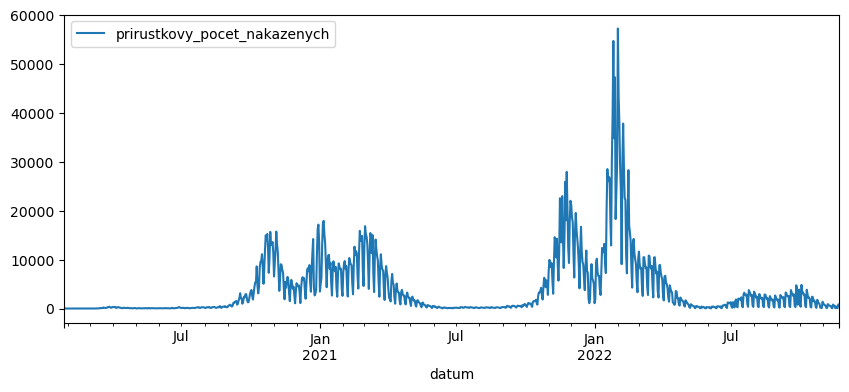

In [45]:
covid.plot(x='datum', y='prirustkovy_pocet_nakazenych', figsize=(10, 4));

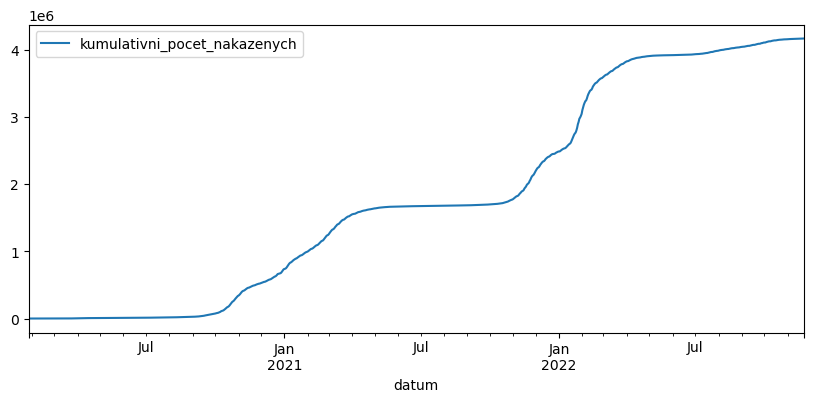

In [46]:
covid.plot(x='datum', y='kumulativni_pocet_nakazenych', figsize=(10, 4));

### Working with DataFrames

Now that we can get data into a DataFrame, we can finally start working with them. **pandas** has an abundance of functionality, far too much for me to cover in this introduction. I'd encourage anyone interested in diving deeper into the library to check out its [excellent documentation](http://pandas.pydata.org/pandas-docs/stable/). Or just use Google - there are a lot of Stack Overflow questions and blog posts covering specifics of the library.

So back to our titanic dataset. Get some information about it.

### Inspection
**pandas** has a variety of functions for getting basic information about your DataFrame, the most basic of which is using the info method.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


The output tells a few things about our DataFrame.

 - It's obviously an instance of a DataFrame.
 - Each row was assigned an index of 0 to N-1, where N is the number of rows in the DataFrame. pandas will do this by default if an index is not specified. Don't worry, this can be changed later.
 - There are 891 rows (every row must have an index).
 - Our dataset has 15 columns, where few has missing some values (age, embarked, deck and embark_town).
 - The last datatypes of each column, but not necessarily in the corresponding order to the listed columns. You should use the dtypes method to get the datatype for each column.
 - An approximate amount of RAM used to hold the DataFrame. See the .memory_usage method

DataFrame's also have a describe method, which is great for seeing basic statistics about the dataset's numeric columns. Be careful though, since this will return information on all columns of a numeric datatype.

In [48]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


You will notice that I've used the head method regularly throughout this lecture - by default, head displays the first five records of the dataset, while tail displays the last five.

In [49]:
df.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [50]:
df.tail(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


Alternatively, Python's regular slicing syntax works as well.

In [51]:
df[10:16]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True


Check dataset dimensions.. how many row and columns?

In [52]:
df.shape

(891, 15)

Print column names and types

In [53]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [54]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Selecting data

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

Selecting a single column from the DataFrame will return a Series object.

In [55]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [56]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

To select multiple columns, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [57]:
df[['sex', 'age', 'survived']]

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
...,...,...,...
886,male,27.0,0
887,female,19.0,1
888,female,NaN,0
889,male,26.0,1


## Selecting with conditions
Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [58]:
df.age[df.age > 35]

1      38.0
6      54.0
11     58.0
13     39.0
15     55.0
       ... 
865    42.0
871    47.0
873    47.0
879    56.0
885    39.0
Name: age, Length: 217, dtype: float64

In [59]:
df[df.age > 35]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


## Selecting data using `iloc`
The `iloc` indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.

The iloc indexer syntax is `df.iloc[<row selection>, <column selection>]`, which is sure to be a source of confusion for R users. `iloc` in pandas is used to select rows and columns by number, in the order that they appear in the data frame.

In [60]:
# Single selections using iloc and DataFrame
# Rows:
df.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
df.iloc[1] # second row of data frame (Evan Zigomalas)
df.iloc[-1] # last row of data frame (Mi Richan)
# Columns:
df.iloc[:,0] # first column of data frame (first_name)
df.iloc[:,1] # second column of data frame (last_name)
df.iloc[:,-1] # last column of data frame (id)
# Multiple row and column selections using iloc and DataFrame
df.iloc[0:5] # first five rows of dataframe
df.iloc[:, 0:2] # first two columns of data frame with all rows
df.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
df.iloc[:5, -3:] # first 5 rows and last 3 columns.

,embark_town,alive,alone
0,Southampton,no,False
1,Cherbourg,yes,False
2,Southampton,yes,True
3,Southampton,yes,False
4,Southampton,no,True


In [61]:
df.iloc[:, 1]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [62]:
df.iloc[[1, 50, 300]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
300,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


## Selecting data using “loc”
The Pandas loc indexer can be used with DataFrames for selecting rows by label/index

In [63]:
r = prfuk.set_index('rok')
r

,přihlášeno,přijato,úspěšnost
rok,,,
2009,1524,964,0.632546
2010,1607,1130,0.703174
2011,1793,1168,0.651422
2012,1751,1031,0.588806
2013,1629,1077,0.661142
2014,1563,1114,0.712732
2015,1564,1092,0.698210
2016,1415,1018,0.719435


In [64]:
r.loc[2013]

přihlášeno    1629.000000
přijato       1077.000000
úspěšnost        0.661142
Name: 2013, dtype: float64

In [65]:
r.loc[[2011, 2013, 2015], ['přihlášeno', 'přijato']]

,přihlášeno,přijato
rok,,
2011,1793,1168
2013,1629,1077
2015,1564,1092


### Boolean indexing

In [66]:
r.loc[r['přijato'] > 1100]

,přihlášeno,přijato,úspěšnost
rok,,,
2010,1607,1130,0.703174
2011,1793,1168,0.651422
2014,1563,1114,0.712732


In [67]:
r[r['přijato'] > 1100]

,přihlášeno,přijato,úspěšnost
rok,,,
2010,1607,1130,0.703174
2011,1793,1168,0.651422
2014,1563,1114,0.712732


In [68]:
type(r.loc[r['přijato'] > 1100, 'přihlášeno'])

pandas.core.series.Series

In [69]:
r.loc[r['přijato'] > 1100, ['přihlášeno', 'přijato']]

,přihlášeno,přijato
rok,,
2010,1607,1130
2011,1793,1168
2014,1563,1114


The simplified rules of indexing are:

 - Use `loc` for label-based indexing or boolean
 - Use `iloc` for positional indexing

### Examples
Only age, sex and pclass of baby passengers (younger than 1 year), who have survived

In [70]:
df.loc[(df.survived == 1 ) & (df.age <= 1 ), ['age', 'sex', 'pclass']]

,age,sex,pclass
78,0.83,male,2
172,1.00,female,3
183,1.00,male,2
305,0.92,male,1
381,1.00,female,3
469,0.75,female,3
644,0.75,female,3
755,0.67,male,2
788,1.00,male,3
803,0.42,male,3


## Counting
How many people survived and what is the percentage?

In [71]:
df[df.survived == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [72]:
df.deck[df.survived == 1].count()

136

`value_counts()` provides occurance of each unique values in the column.

In [73]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [74]:
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [75]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [76]:
df[df.survived == 1].sex.value_counts()

female    233
male      109
Name: sex, dtype: int64

### Compute a simple cross-tabulation
Cross tabulation between gender and survived?

In [77]:
pd.crosstab(df.sex, df.survived )

survived,0,1
sex,,
female,81,233
male,468,109


In what class?

In [78]:
pd.crosstab(df['class'], df['survived'])

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


Cross tabulation between passenger class and from where they embarked the ship?

In [79]:
pd.crosstab(df['class'], df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


In [80]:
df.survived[df.age < 5].value_counts()

1    27
0    13
Name: survived, dtype: int64

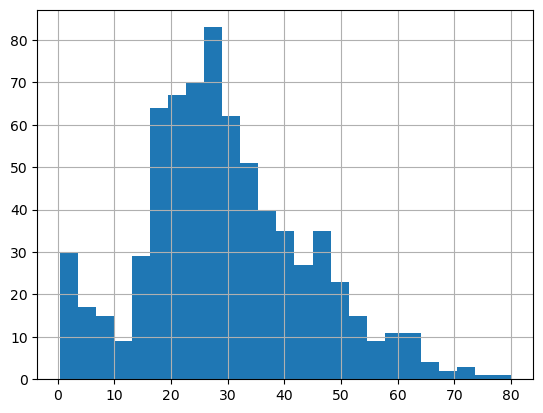

In [81]:
df['age'].hist(bins=25);

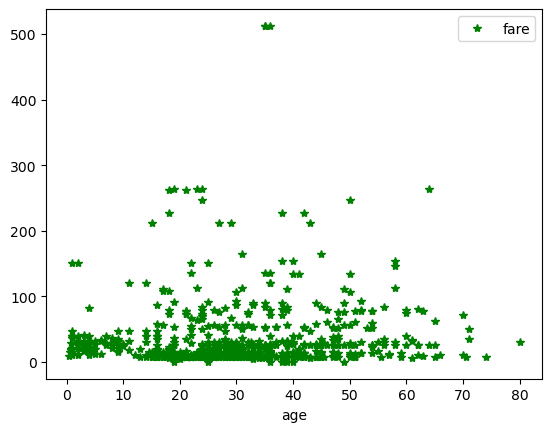

In [82]:
df.plot(x='age', y='fare', style='g*');

In [83]:
df.fare.sum()

28693.9493

In [84]:
df.fare[df.sex == 'male'].sum()

14727.286500000002

In [85]:
df.fare[df.sex == 'female'].sum()

13966.6628

## Grouping
By `group by` we are referring to a process involving one or more of the following steps

 - **Splitting** the data into groups based on some criteria
 - **Applying** a function to each group independently
 - **Combining** the results into a data structure

Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set into groups and do something with those groups yourself. In the apply step, we might wish to one of the following:

 - Aggregation: computing a summary statistic (or statistics) about each group. Some examples:

    - Compute group sums or means
    - Compute group sizes / counts
    - Transformation: perform some group-specific computations and return a like-indexed. Some examples:

 - Standardizing data (zscore) within group
    - Filling NAs within groups with a value derived from each group
    - Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

 - Discarding data that belongs to groups with only a few members
    - Filtering out data based on the group sum or mean
 - Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories

In [86]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [87]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [88]:
df2.groupby(['X']).get_group('B')

,X,Y
0,B,1
1,B,2


In [89]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [90]:
df.groupby('sex')['fare'].sum()

sex
female    13966.6628
male      14727.2865
Name: fare, dtype: float64

In [91]:
df.groupby('who')['fare'].mean()

who
child    32.785795
man      24.864182
woman    46.570711
Name: fare, dtype: float64

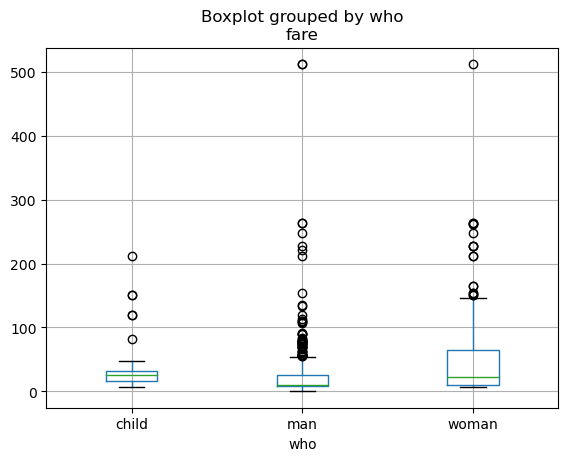

In [92]:
df.boxplot('fare', by='who');